<a href="https://colab.research.google.com/github/K4ztark/Problema-AnalisisNumerico/blob/main/Analisis_numerico1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo de Análisis numérico
####Integrantes: Dylan Stiv López Escobar
####             Juan David Ruiz Quiceno
####             Juan David Díaz Carmona
####             Juan Esteban Castañeda Hincapié
####             Alejandro Taborda López       
               

#Punto A
##El sistema de ecuaciones diferenciales es:
\begin{equation}
\frac{dx}{dt} = v
\end{equation}
\
\begin{equation}
\frac{dv}{dt} = \frac{F(0)Sen(wt)-a|v|v-bx}{m}
\end{equation}

##Ahora introducimos la función vectorial, el campo vectorial y el vector Ua:
\begin{equation}
F(t,U)=
\begin{bmatrix}
v  \\
\frac{F(0)Sen(wt)-a|v|v-bx}{m}  \\
\end{bmatrix}
\end{equation}
\
\begin{equation}
U(t)=
\begin{bmatrix}
v(t)  \\
x(t)  \\
\end{bmatrix}
\end{equation}
\
\begin{equation}
U(0)=
\begin{bmatrix}
0  \\
1  \\
\end{bmatrix}
\end{equation}

In [ ]:
import matplotlib.pyplot as plt
import math

El vector de los intervalos de tiempo es: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 

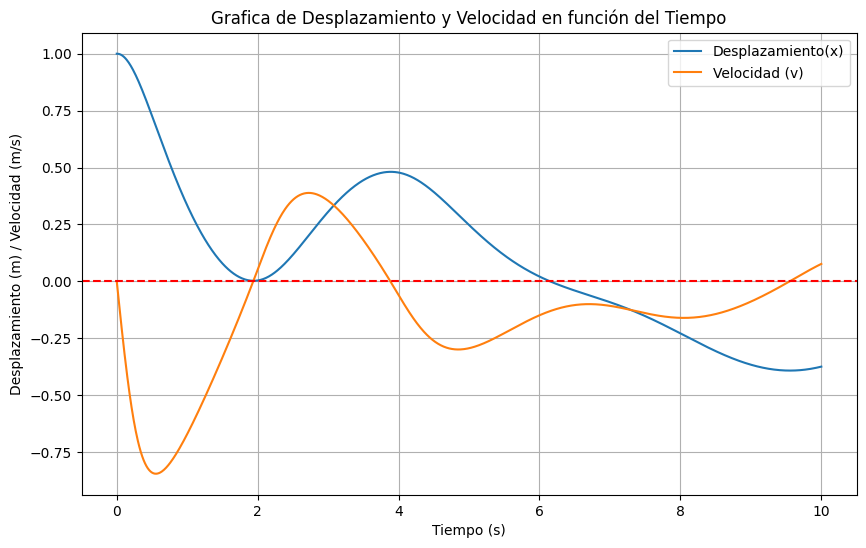


Intervalos en los que la masa pasa por la posición de equilibrio:
(6.149999999999913, 6.159999999999913)


In [ ]:
'''PUNTO B'''

import math
import matplotlib.pyplot as plt


m = 2
a = 5
b = 6
F0 = 2
w = 0.5       #Inicializamos las variables necesarias para el problema
dt = 0.01
t = 10

def dx_dt(x, t, v):   #Creamos la primera ecuación, aunque en el código no la llamamos
    return v

def dv_dt(x, t, v):   #Creamos la segunda ecuación
    return ((F0 * (math.sin(w * t)) - (a * abs(v) * v) - (b * x)) / m)

def metodo_euler():
    pasos = int((t / dt) + 1)
    vectortiempo = [0.0]
    vectordesplazamiento = [1.0]   #Creamos los vectores donde se almacena la información, poniendo en cada uno de ellos los valores iniciales
    vectorvelocidad = [0.0]

    for i in range(1, pasos):  #Creamos un for para iterar sobre los vectores y empezar a llenarlos y aplicamos el método de Euler
        vectortiempo.append(vectortiempo[i-1] + dt)
        vectordesplazamiento.append(vectordesplazamiento[i-1] + vectorvelocidad[i-1] * dt)
        vectorvelocidad.append(vectorvelocidad[i-1] + dt * dv_dt(vectordesplazamiento[i-1], vectortiempo[i-1], vectorvelocidad[i-1]))

    print("El vector de los intervalos de tiempo es:",vectortiempo)
    print("")
    print("El vector de las aproximaciones del desplazamiento es:",vectordesplazamiento)  #Imprimimos cada uno de los vectores
    print("")
    print("El vector de las aproximaciones de la velocidad es:",vectorvelocidad)
    print("")

    '''PUNTO C'''

    plt.figure(figsize=(10, 6))
    plt.plot(vectortiempo, vectordesplazamiento, label='Desplazamiento(x)')
    plt.plot(vectortiempo, vectorvelocidad, label='Velocidad (v)')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title('Grafica de Desplazamiento y Velocidad en función del Tiempo')   #Con ayuda de la libreria Matplotlib hacemos la grafica de desplazamiento y velocidad vs tiempo
    plt.xlabel('Tiempo (s)')                                                   #Y graficamos una linea en y=0 para dejar mas claro donde queda el punto de equilibrio
    plt.ylabel('Desplazamiento (m) / Velocidad (m/s)')
    plt.legend()
    plt.grid(True)
    plt.show()
    print("")

    '''PUNTO D'''

    def equilibrio(tiempo, desplazamiento):
        inter = []
        for i in range(len(desplazamiento)-1):
            if desplazamiento[i] * desplazamiento[i + 1] < 0:                   #Para calcular el intervalo en el punto de equilibrio, recorremos el vector de desplazamiento
                inter.append((tiempo[i], tiempo[i + 1]))                        #Y agregamos a una lista el valor que multiplicado por el siguiente es menor que 0, es decir, hay un cambio de signo
        return inter

    intervalos = equilibrio(vectortiempo, vectordesplazamiento)

    print("Intervalos en los que la masa pasa por la posición de equilibrio:")
    for intervalo in intervalos:
        print(intervalo)



metodo_euler()

